In [1]:
import numpy as np
from PIL import Image
import math
import random
import sys, getopt
from scipy.fft import fft2, fftfreq, fftshift, ifft2
from scipy import fftpack, ndimage
from matplotlib import pyplot as plt
import cmath
from scipy.signal import convolve2d
from matplotlib.pyplot import imread

In [2]:
def M(x, y):
    if(x**2 + y**2 < (math.pi/2)**2):
        return 1
    else:
        return 0

In [3]:
def p_s(x, y, delta_z):
    return 0.375 * delta_z * math.pi * (x**2 + y**2)

In [4]:
def p(x, y):
    return 0.5 * math.pi * (x**2 + y**2)

In [5]:
def h(delta_z):  # создает матрицу для фильтра нужной нам размерности (h)
# от сигма зависит степень размытия. чем больше сигма тем больше размытие
    
    matr = np.zeros(shape = (512,512), dtype = np.complex128) # матрица из 0 (по размеру изборжания подаваемого)
                                          
    #|F(M(x,y)∙exp{i∙p_s (x,y,∆z_nm )+i∙p(x,y)})|
    
    #p_s = 0.375* math.pi * (разность между слоями) * (x**2 + y**2) 
     
    for i in range(matr.shape[0]):
        for j in range(matr.shape[1]):
            x = math.pi/511*(i-255)
            y = math.pi/511*(j-255)
            matr[i, j] = M(x,y) * cmath.exp(1j * p_s(x, y, delta_z) + 1j * p(x, y))
            #print(i, ' ', j,' ', matr[i,j], '\n')
    #s = np.sum(matr)
    #matr /= s
    return abs(fftshift(fft2(matr)))

<class 'list'>
<class 'list'>


'\nplt.imshow(final[2],cmap = "gist_gray")\nplt.colorbar()\n    '

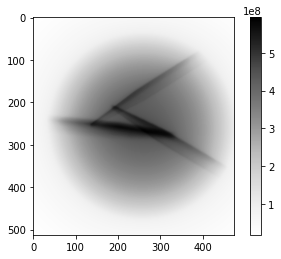

In [16]:
%matplotlib inline
#зубочистка

#1 слой
im1 = Image.open('src.png', 'r')#convert('L') # нормкльные цвета
#im = Image.open('result.png', 'r') -  инвертированные цвета
data = np.array(im1)         # массив чисел из которых сост изображение
data_im1_fl = data[:,:,0].astype(np.float) # рассматриваем как float

#2 слой
im2 = Image.open('src_0002.png', 'r')
data_im2 = np.array(im2)
data_im2_fl = data_im2[:,:,0].astype(np.float)

#3 слой
im3 = Image.open('src_0008.png', 'r')
data_im3 = np.array(im3)
data_im3_fl = data_im3[:,:,0].astype(np.float)

'''
plt.imshow(data_im1_fl)
plt.show()
plt.imshow(data_im2_fl)
plt.show()
plt.imshow(data_im3_fl)
plt.show()
'''
#im = im.convert('1', dither=Image.NONE)
#im.save('result.png')

delta_z = 0


#image_f = abs(fftshift(fft2(data_f)))
#h_f = abs(fftshift(fft2(h(delta_z))))

#plt.imshow(image_f, cmap="Greys")
#plt.colorbar()

#con = convolve2d(data_f, h(delta_z), mode='same')

#pr = image_f * h(delta_z)

#1 слой, разширение матрицы, ПФ для матрицы 
im1_f_n = np.zeros(shape = (1024,1024), dtype = complex)
im1_f_n[0:512,0:512] = data_im1_fl
im1_f_n = fftshift(fft2(im1_f_n))


#2 слой, разширение матрицы, ПФ для матрицы 
im2_f_n = np.zeros(shape = (1024,1024), dtype = complex)
im2_f_n[0:512,0:512] = data_im2_fl
im2_f_n = fftshift(fft2(im2_f_n))

#3 слой, разширение матрицы, ПФ для матрицы 
im3_f_n = np.zeros(shape = (1024,1024), dtype = complex)
im3_f_n[0:512,0:512] = data_im3_fl
im3_f_n = fftshift(fft2(im3_f_n))


pics = [im1_f_n, im2_f_n, im3_f_n]
three = [im1_f_n, im2_f_n, im3_f_n]
final = [im1_f_n, im2_f_n, im3_f_n]

k = len(pics)
mas_of_h = [0] * (2*k-1)
print(type(mas_of_h))

#считаем h [-кол-во_изобр, +кол-во_изобр]
for i in range (-len(pics)+1, len(pics)):
    h_f_n = np.zeros(shape = (1024,1024), dtype = complex)
    h_f_n[0:512, 0:512] = h(delta_z = math.pi * i)
    mas_of_h[i+len(pics)-1] += fftshift(fft2(h_f_n))
    

for m in range(len(pics)):
    for n in range(len(pics)):
        three[n] = abs(ifft2(pics[n] * mas_of_h[n-m+2])) 
    final[m] = (three[0] + three[1] + three[2]) / 3 #* delta_z

    
'''
for m in range(len(pics)):
    for n in range(len(pics)):
        h_f_n = np.zeros(shape = (1024,1024), dtype = complex)
        h_f_n[0:512, 0:512] = h(delta_z = math.pi * (n-m))
        h_f_n = fftshift(fft2(h_f_n))
        three[n] = abs(ifft2(pics[n] * h_f_n))      #получаем три изображения, с разным размытием для каждого слоя
        #final[m] += three[n]
    final[m] = (three[0] + three[1] + three[2]) / 3 #* delta_z
''' 

#pr = im_f_n * h_f_n # перемножение матриц изображнения и h

#print((pr.shape[0]))
#print((pr.shape[1]))



#print(type(image_f))
#res = np.array(np.size(image_f) + np.size(h(delta_z)) - 1)

#for i in range (np.size(res)):
#    for j in range (np.size(h(delta_z))):
#        if(i - j < np.size(image_f)):
#            res[i]+=image_f[i-j] * h[j]

#plt.imshow(res, cmap="Greys")
#plt.colorbar()

#final = abs(ifft2(pr[0]))


print(type(final))

plt.imshow(final[1][255:768,255:728], cmap = "Greys")
plt.colorbar()
'''
plt.imshow(final[2],cmap = "gist_gray")
plt.colorbar()
    '''


#print((final.shape[0]))
#print((final.shape[1]))

#plt.imshow(h(delta_z), cmap="Greys")
#plt.colorbar()